<a href="https://colab.research.google.com/github/chamudithamk/ME422-B2-Lab-Group/blob/main/Vibration/E20_198_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E/20/198 | ME422 Vibration Lab Report**

---

**ACTIVITY 1: DERIVATION OF 2-DOF MODEL THAT WILL CAPTURE THE FIRST TWO DOMINANT MODES OF SMALL AMPLITUDE VIBRATION OF THE SYSTEM**

Consider following schematic diagram of the experimental setup in usual notations.


<center>

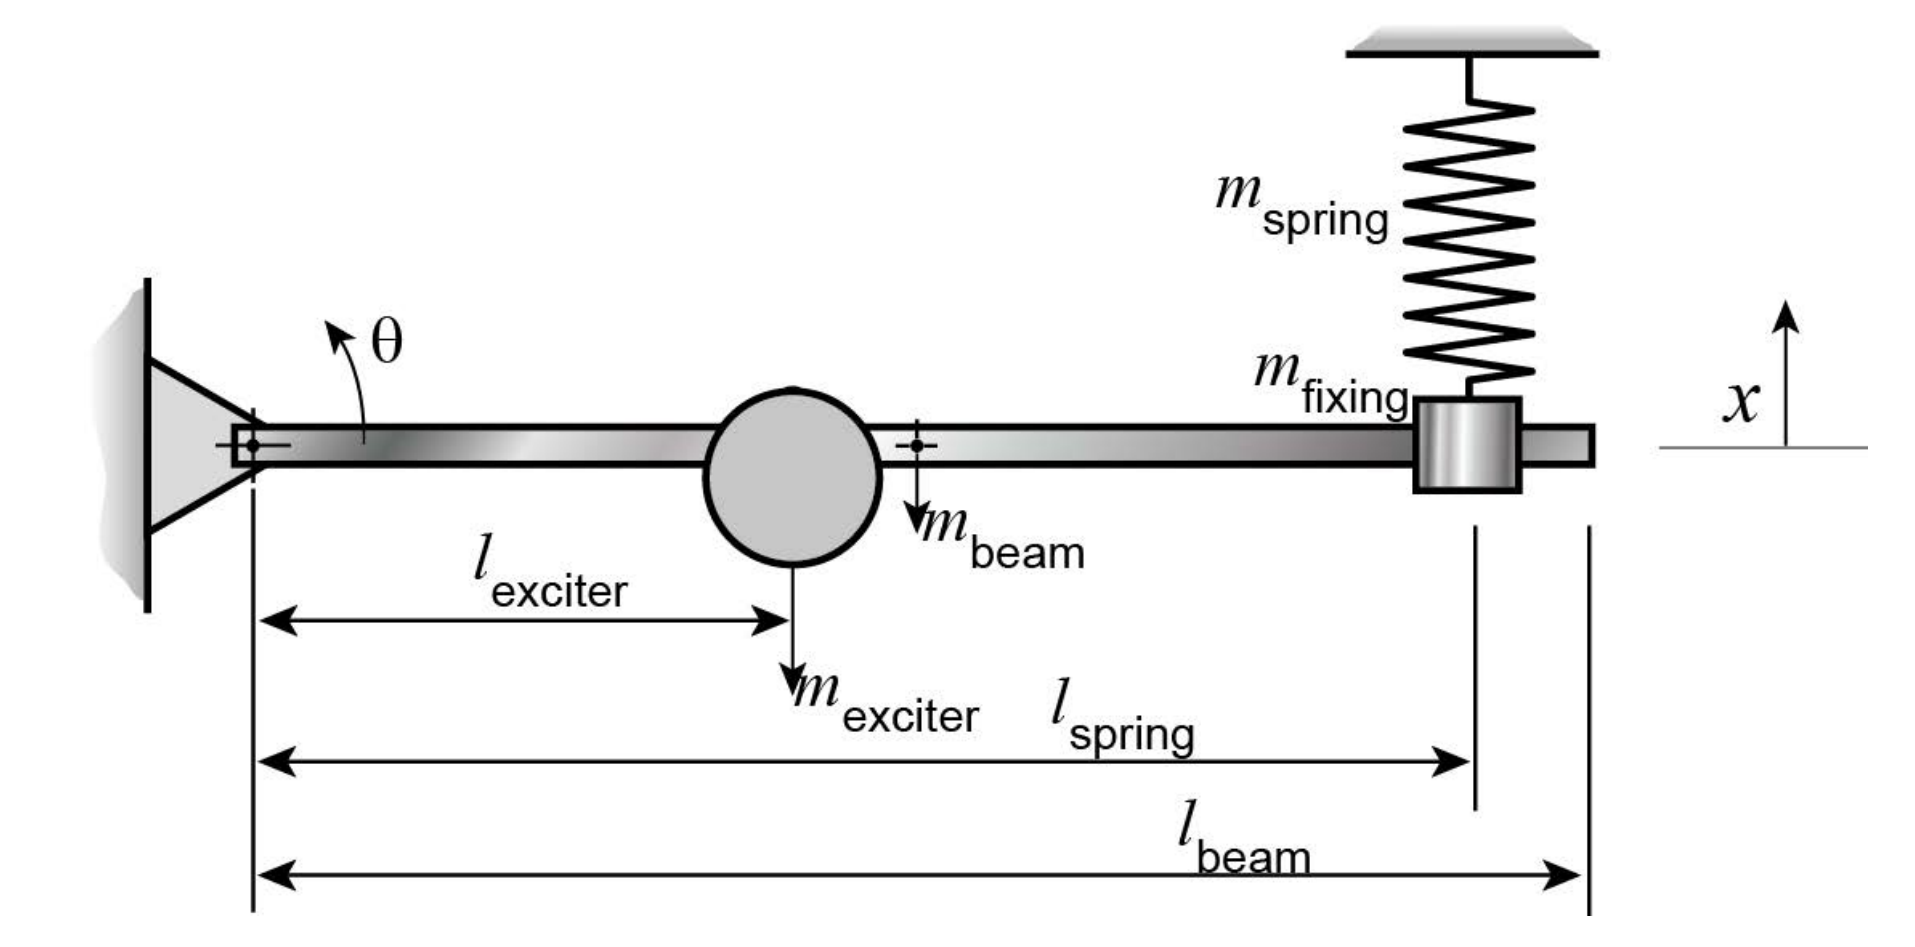

</center>

Account the following assumptions for the theoritical estimation:



---

**ACTIVITY 2: ESTIMATION OF DAMPING RATII OF THE TWO DOMINANT MODES**

---

**ACTIVITY 3: GRAPHICAL REPRESENTATION OF SELECTED PARAMETERS**

---

**ACTIVITY 4: COMPARISON OF EXPERIMENTAL RESULTS WITH THEORETICAL ESTIMATES**

---

**ACTIVITY 5: DESIGN OF A TUNED MASS VIBRATION ABSORBER FOR OPERATING THE SYSTEM NEAR FIRST NATURAL MODE OF VIBRATION AND JUSTIFICATION USING SIMULATIONS**

---

**ACTIVITY 6: EXPERIMENTAL VERTIFICATION OF TUNED MASS VIBRATION ABSORBER DESIGN**